### Uniform FP:

In [1]:
import h5py
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/false_positive'

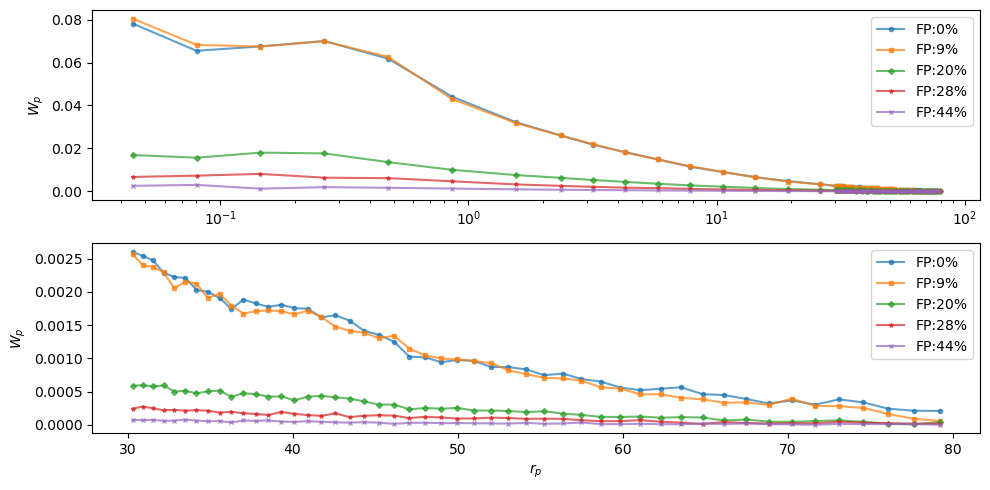

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,5))

save_files = ['wp_fof_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_10percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_25percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_40percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_80percent_cosmo_10p_Box250_Part750_0000.hdf5'
              ]
ratio = [0, 0.1, 0.25, 0.4,  0.8]
fps = [ int(100*r/(1+r)) for r in ratio]
labels = [f'FP:{fps[0]}%', f'FP:{fps[1]}%', f'FP:{fps[2]}%', f'FP:{fps[3]}%', f'FP:{fps[4]}%']
markers = ['o', 's', 'D', '*', 'x']

for i, save_file in enumerate(save_files):
    with h5py.File(op.join(save_dir, save_file), 'r') as f:
        wp = np.mean(f['corr'][:], axis=1)
        rp = f['r'][:]/2
        ax[0].plot(rp, wp, label=labels[i], marker=markers[i], markersize=3, alpha=0.7)
        ind = np.where(rp>30)[0]
        ax[1].plot(rp[ind], wp[ind], label=labels[i], marker=markers[i], markersize=3, alpha=0.7)

ax[0].set_xscale('log')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'$W_p$')
ax[1].set_ylabel(r'$W_p$')
ax[1].set_xlabel(r'$r_p$')
fig.tight_layout()
fig.savefig(op.join(save_dir, 'wp_fof_cosmo_10p_Box250_Part750_0000.png'))

In [23]:
fps

[0, 9, 44, 75]

In [5]:
0.4/1.4

0.28571428571428575